### Heat Map

- quantitative Vs quantitative variable
- good for discrete variable vs discrete variable
- good alternative to transparency for a lot of data
- bin sizes are important

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

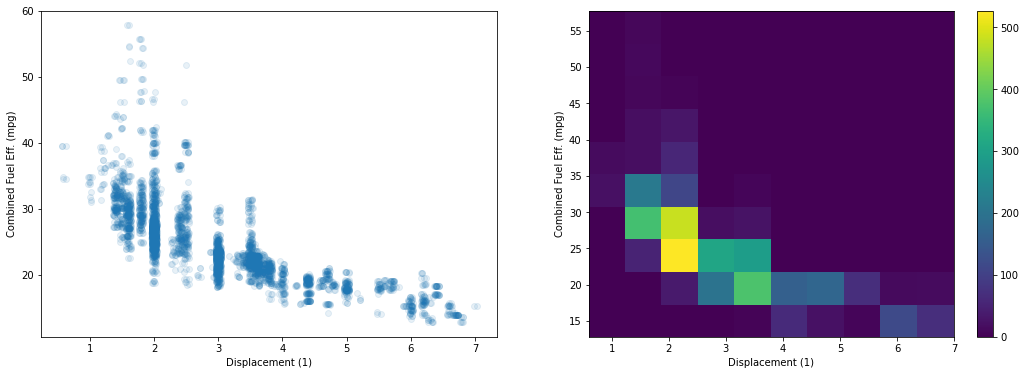

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)


plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

### Example 2. Heat plot - Set a minimum bound on counts and a reverse color map

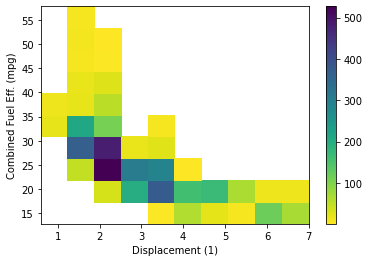

In [4]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 3. Heat plot - Specify bin edges

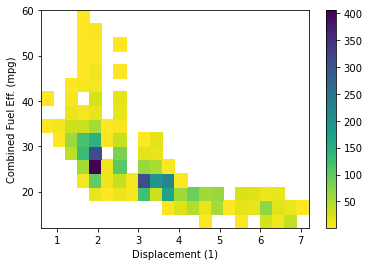

In [5]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

### Annotations on each cell

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

### Example 4. Add text annotation on each cell using pyplot.text() function

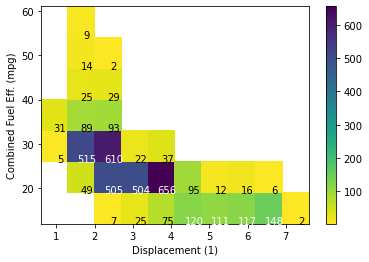

In [6]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')